In [1]:
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import one_hot_label
from generate_data import generate_data
from modules import Dropout
from modules import Linear, Sequential
from modules.losses import LossMSE, LossSoftmaxCrossEntropy
from generate_data import generate_grid_data
from modules.activations import ReLU
from optimizers import SGD

ccenter: 
 0.5000
 0.5000
[torch.FloatTensor of size 2]



In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    if torch.is_tensor(points):
        points = points.numpy()
    
    print("points: {} -- points: {}".format(type(points), points.shape))
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [3]:
def default_net_1(x_train, y_train, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    ce = LossSoftmaxCrossEntropy()

    model = Sequential()
    model.add(Linear(out=num_of_neurons[1], input_size=num_of_neurons[0], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Dropout(prob=0.2))
    model.add(Linear(out=num_of_neurons[4]))

    model.loss = ce
    sgd = SGD(lr, momentum_coef, weight_decay=0.2)

    # TODO verbose
    sgd.train(model, x_train, y_train, num_of_epochs)

    return model, ce.loss_logging

In [4]:
points, labels = generate_data(num_of_points=1000)
points, labels = generate_grid_data(num_of_points_per_dim=51)
print("Points: {} -- labels: {}".format(points.shape, labels.shape))

ccenter: 
 0.5000
 0.5000
[torch.FloatTensor of size 2]

Points: torch.Size([2601, 2]) -- labels: torch.Size([2601])


points: <class 'numpy.ndarray'> -- points: (2601, 2)


array([ 0.], dtype=float32)

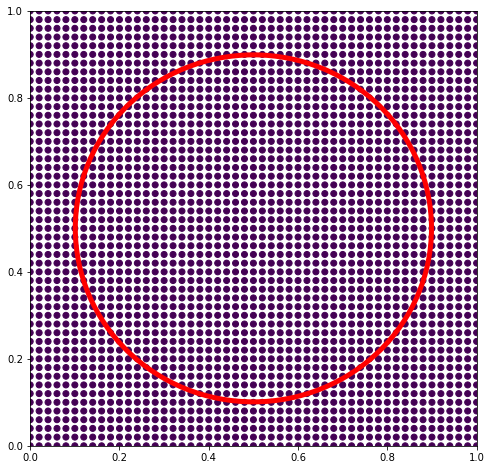

In [5]:
plot_data(points, labels)
np.unique(labels.numpy())

In [6]:
print(labels)


 0
 0
 0
⋮ 
 0
 0
 0
[torch.FloatTensor of size 2601]



In [4]:

labels = one_hot_label(labels, val=0)  # convert labels to 1-hot encoding

model, loss1 = default_net_1(points, labels, num_of_epochs=5000)
print(loss1)

  0%|          | 14/5000 [00:00<00:35, 139.71it/s]

@initialize
Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
@initialize
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
@initialize
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
@initialize
Added Module Name: 7_Linear 


100%|██████████| 5000/5000 [00:11<00:00, 444.09it/s]


 0.6987
 0.6967
 0.6952
   ⋮   
 0.0204
 0.0177
 0.0179
[torch.FloatTensor of size 5000]



In [7]:
data, labels = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51, is_torch=True)
model.print_model()

Name: 0_Linear
Name: 1_ReLU
Name: 2_Linear
Name: 3_ReLU
Name: 4_Linear
Name: 5_ReLU
Name: 6_Dropout
Name: 7_Linear


In [8]:
out1 = model.predict(data)
print(out1)


 0
 0
 0
⋮ 
 0
 0
 0
[torch.LongTensor of size 2601]



torch.Size([2601, 2])  --  torch.Size([2601])


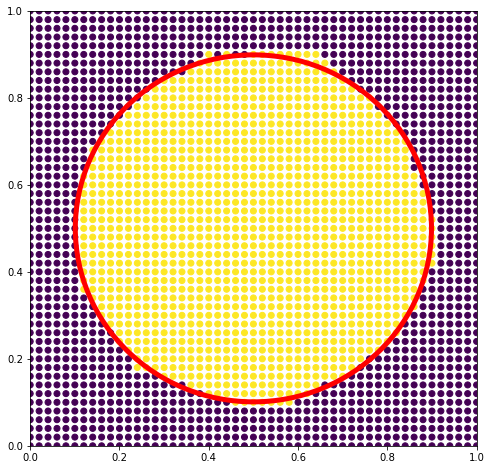

In [9]:
print(data.shape, " -- ", out1.shape)
plot_data(data, out1)

In [10]:
print(out1.shape, " -- ", data.shape)
model.evaluate(data, out1)

torch.Size([2601])  --  torch.Size([2601, 2])


0.9938485198000769